# LAB 3: NCI60

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
nci_data = pd.read_csv('nci_data.csv')
nci_labels = pd.read_csv('nci_labs.csv')
cancer_label = nci_labels.to_numpy()[:,1]
observations = nci_data.iloc[:,0].to_numpy()
features = nci_data.columns.values[1:]
print(np.shape(features))
print(nci_labels)

(6830,)
    Unnamed: 0            x
0            1          CNS
1            2          CNS
2            3          CNS
3            4        RENAL
4            5       BREAST
5            6          CNS
6            7          CNS
7            8       BREAST
8            9        NSCLC
9           10        NSCLC
10          11        RENAL
11          12        RENAL
12          13        RENAL
13          14        RENAL
14          15        RENAL
15          16        RENAL
16          17        RENAL
17          18       BREAST
18          19        NSCLC
19          20        RENAL
20          21      UNKNOWN
21          22      OVARIAN
22          23     MELANOMA
23          24     PROSTATE
24          25      OVARIAN
25          26      OVARIAN
26          27      OVARIAN
27          28      OVARIAN
28          29      OVARIAN
29          30     PROSTATE
..         ...          ...
34          35  K562B-repro
35          36  K562A-repro
36          37     LEUKEMIA
37          

In [8]:
# Define values
x = nci_data.iloc[:, 1:6831].values
print(np.shape(x))

# Standarize data
x = StandardScaler().fit_transform(x)
print(x)

(64, 6830)
[[ 0.72867057  1.60722049  1.32568834 ...  0.52089301 -0.83636534
  -1.38467476]
 [ 1.59641782  1.7535441   0.44168566 ... -0.8236521  -0.92542475
  -1.43144619]
 [ 2.19028963 -0.01621694 -0.34909222 ...  0.00870438 -0.96095134
  -0.09583766]
 ...
 [ 0.52313039 -0.78801506 -0.30257053 ...  0.36723642  3.38176079
   2.53525983]
 [-0.07065235  0.22330662 -0.16300549 ... -0.46507011 -0.21343532
  -1.2444386 ]
 [ 0.84285956 -0.32227482  0.09286376 ...  0.53369773 -0.49820333
   0.71218974]]


In [9]:
# Compute PCA
pca = PCA()
pca_data = pca.fit_transform(x)

In [10]:
# Examine component loadings
pca_loadings = (pca.components_).T
pca_loadings_df = pd.DataFrame(pca_loadings, index=features)
print(pca_loadings_df)

            0         1         2         3         4         5         6   \
1    -0.010682 -0.001324  0.008504  0.003524  0.010127  0.028904 -0.007825   
2    -0.002312 -0.001675  0.010257 -0.002604  0.011401  0.011243 -0.001883   
3    -0.005880  0.006289  0.010055  0.010681 -0.010265  0.018449  0.007331   
4     0.003278 -0.002666  0.008362  0.007476 -0.011248  0.005553  0.003868   
5    -0.007678  0.002508  0.013821 -0.009509 -0.004095 -0.002732 -0.003956   
6     0.002267  0.009678  0.010818  0.012751  0.007197  0.010588 -0.010473   
7    -0.008588 -0.008362  0.013557  0.003420  0.008981  0.013542  0.006957   
8    -0.004976 -0.009253  0.011433  0.008848  0.006268  0.011405  0.000219   
9    -0.004528 -0.000639  0.018870 -0.006182  0.015131 -0.002502  0.001427   
10   -0.008123  0.014431  0.014014 -0.001974  0.004247  0.017523  0.023641   
11   -0.001525 -0.013416  0.010881  0.000547  0.000026  0.006665  0.009761   
12    0.000668 -0.012961  0.018398  0.000204 -0.000355 -0.000032

In [11]:
# Examine score vectos
pca_score_vectors = pca_data
pca_score_vectors_df = pd.DataFrame(pca_score_vectors, index=observations)
print(pca_score_vectors_df)

            0          1          2          3          4          5   \
V1  -19.838042  -3.555636  -9.812399  -0.824246  12.609984   7.471505   
V2  -23.089215  -6.441460 -13.478251   5.635308   8.035496   3.715178   
V3  -27.456114  -2.465143  -3.533054  -1.341673  12.564846  17.344925   
V4  -42.816801   9.768358  -0.890073   3.445043  42.269904  27.238815   
V5  -55.418530   5.198897 -21.094558  15.849712  10.443273  12.991051   
V6  -27.178046  -6.780302 -21.813380  13.840873  -7.997553   0.712941   
V7  -31.445938  -3.864070 -30.354536  41.664903 -10.425585 -17.002023   
V8  -22.332335 -10.396414 -18.757153   6.951753   5.528218  11.730641   
V9  -14.289921 -16.109430 -19.757438   6.565586   3.802939  -8.021668   
V10 -29.748118 -23.993200  -5.885870 -10.020762  -3.451899  11.694275   
V11 -30.746925  -9.881966   7.982927 -16.432134  -4.110045  19.150384   
V12 -34.414331  -9.744441  -6.762486  -8.867369   6.596890  14.803416   
V13 -17.036341 -14.949974  -9.784848 -12.204938  -5

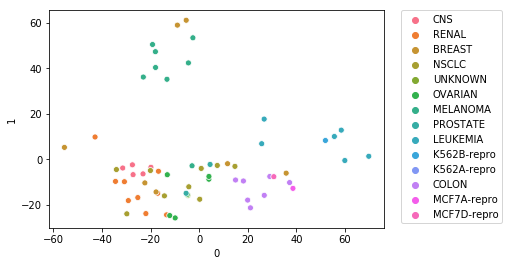

In [22]:
from seaborn import scatterplot

ax = scatterplot(pca_score_vectors_df.iloc[:, 0], pca_score_vectors_df.iloc[:, 1], hue=cancer_label);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [24]:
variance = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_

variance_df = pd.DataFrame([variance, variance_ratio], index = ['Variance', 'Variance_ratio'])
print(variance_df)

                        0           1           2           3           4   \
Variance        788.130264  468.773214  399.086552  294.712859  259.147796   
Variance_ratio    0.113589    0.067562    0.057518    0.042476    0.037350   

                        5           6           7           8           9   \
Variance        251.075497  212.747164  186.359041  175.507015  164.847585   
Variance_ratio    0.036186    0.030662    0.026859    0.025295    0.023759   

                ...         54         55         56         57         58  \
Variance        ...  35.510531  33.416792  30.424853  28.451382  25.612386   
Variance_ratio  ...   0.005118   0.004816   0.004385   0.004101   0.003691   

                       59         60         61         62            63  
Variance        22.287911  17.713013  16.928216  16.590878  1.554313e-28  
Variance_ratio   0.003212   0.002553   0.002440   0.002391  2.240156e-32  

[2 rows x 64 columns]


Text(0.5, 0, 'Component')

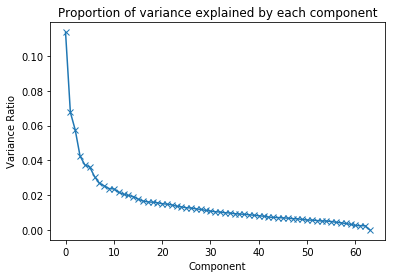

In [28]:
# Plot variance explained by each component 
plt.plot(variance_df.loc['Variance_ratio'], marker='x')
plt.title('Proportion of variance explained by each component')
plt.ylabel('Variance Ratio');
plt.xlabel('Component');

Text(0.5, 0, 'Component')

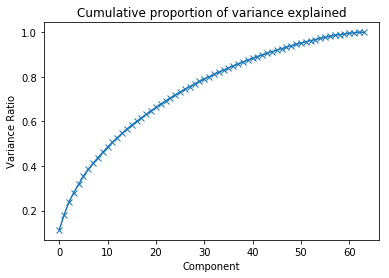

In [31]:
# Plot cumulative sum of variance explained by each component
cumulative_values = np.cumsum(variance_ratio)
plt.plot(cumulative_values, marker = 'x')
plt.title('Cumulative proportion of variance explained')
plt.ylabel('Variance Ratio');
plt.xlabel('Component');